In [ ]:
#1

(301, 28)


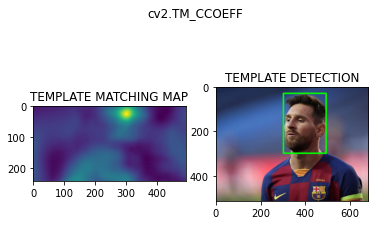





(301, 28)


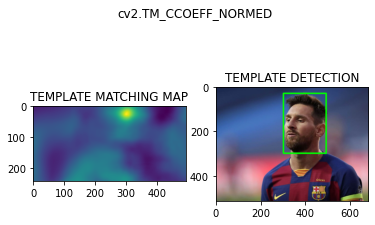





(0, 224)


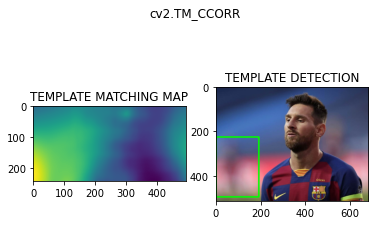





(301, 28)


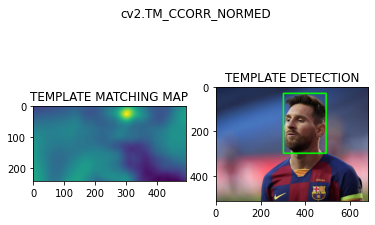





(301, 28)


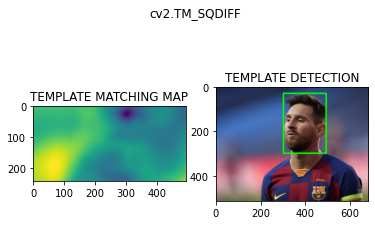





(301, 28)


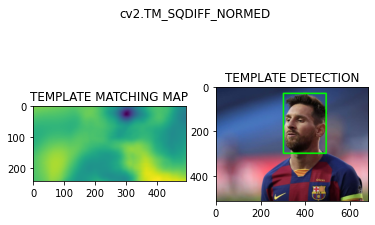

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

template = cv2.imread("images/template1.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
img = cv2.imread("images/image1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.imshow(template)
#--dimensiones de la plantilla
template.shape
#--lista con los nombres de diferentes métodos de coincidencia de plantillas.
methods =["cv2.TM_CCOEFF" , "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR" ,
          "cv2.TM_CCORR_NORMED" , "cv2.TM_SQDIFF" , "cv2.TM_SQDIFF_NORMED"]

#--obtener los resultados para cada metodo
for m in methods:
  img_copy = img.copy()
  method = eval(m)
  res = cv2.matchTemplate(img_copy,template,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  print(top_left)    

  height, width, channels = template.shape  
  bottom_right = (top_left[0]+width, top_left[1]+height)

  cv2.rectangle(img_copy, top_left, bottom_right, (0,255,0),6)

  plt.subplot(121)
  plt.imshow(res)
  plt.title("TEMPLATE MATCHING MAP")
  plt.subplot(122)
  plt.imshow(img_copy)
  plt.title("TEMPLATE DETECTION")
  plt.suptitle(m)

  plt.show()
  print("\n")
  print("\n")

In [1]:
#2

In [4]:
import cv2
import numpy as np

img_rgb = cv2.imread('images/image2.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('images/template2.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#--% de coindidencia
threshold = 0.80
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#3

In [5]:
# importar los paquetes necesarios
import numpy as np
import glob
import os
import cv2
#Ruta a la plantilla
templatePath = 'images/template.jpeg'
#templatePath = 'task3_bonus/Bonus_1/t_1.jpg'
#templatePath = 'task3_bonus/Bonus_2/t_2.jpeg'
#templatePath = 'task3_bonus/Bonus_3/t_3.jpeg'
#ruta a la carpeta de imágenes
imageFolderPath = 'images2'
#imageFolderPath = 'task3_bonus/Bonus_1'
#imageFolderPath = 'task3_bonus/Bonus_2'
#imageFolderPath = 'task3_bonus/Bonus_3'

def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
	# inicializar las dimensiones de la imagen que se cambiará de tamaño y
	# toma el tamaño de la imagen
	dim = None
	(h, w) = image.shape[:2]

	# si tanto el ancho como el alto son None, entonces devuelve la
	# imagen original
	if width is None and height is None:
		return image

	# compruebe si el ancho es None
	if width is None:
		# calcular la relación de la altura y construir las
		# dimensiones
		r = height / float(h)
		dim = (int(w * r), height)

	# de lo contrario, la altura es None
	else:
		# calcular la relación del ancho y construir las
		# dimensiones
		r = width / float(w)
		dim = (width, int(h * r))

	# cambiar el tamaño de la imagen
	resized = cv2.resize(image, dim, interpolation = inter)

	# devolver la imagen redimensionada
	return resized

#imagen de plantilla de lectura
template = cv2.imread(templatePath,0)

#aplicando transformación laplaciana a la plantilla
template = cv2.Laplacian(template,cv2.CV_64F)
template = np.float32(template)
#th y tw son la altura y el ancho de la plantilla
(tH, tW) = template.shape[:2]
i=0
# recorre las imágenes para encontrar la plantilla
for imagePath in glob.glob(imageFolderPath + "/*.jpg"):
	i+=1
	#lee la imagen
	image = cv2.imread(imagePath)
	
	#convierte la imagen a escala de grises
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#aplica desenfoque gaussiano con un tamaño de kernel de 3 en la imagen
	blur = cv2.GaussianBlur(gray,(3,3),0)
	gray = cv2.Laplacian(blur,cv2.CV_64F)
	gray = np.float32(gray)
	found = None
	pos=0
	# bucle sobre las escalas de la imagen
	for scale in np.linspace(0.5, 2, 30):
		# cambiar el tamaño de la imagen de acuerdo con la escala 
		# y realizar un seguimiento de la proporción del cambio de tamaño
		
		resized = resize(gray, width = int(gray.shape[1] * scale))
		r = gray.shape[1] / float(resized.shape[1])

		# si la imagen redimensionada es más pequeña que la plantilla, salir del bucle
		if resized.shape[0] < tH or resized.shape[1] < tW:
			break

		# coincidencia para encontrar la plantilla en la imagen 
		result = cv2.matchTemplate(resized, template, cv2.TM_CCOEFF)
		(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

		# si hemos encontrado un nuevo valor máximo de correlación, 
		# entonces actualice encontrado
		if found is None or maxVal > found[0]:
			found = (maxVal, maxLoc, r)
			(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
			(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
			
			

	# descomprime la variable de contabilidad y calcula las coordenadas (x, y) 
	# del cuadro delimitador en función de la proporción redimensionada
	if found is not None:  # y pos>5:
		# dibujar un cuadro delimitador alrededor del resultado detectado y mostrar la imagen
		(maxVal, maxLoc, r) = found
		if(maxVal>350000):
			print(imagePath,'maxval=',maxVal,'Cursor detectado en la ubicacion:',(int(maxLoc[0] * r), int(maxLoc[1] * r)))
			(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
			(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
			cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		else:
			print(imagePath,'Cursor no detectado')
	
	
	cv2.imshow(imagePath, image)
	cv2.waitKey(0)
	
	

images2\neg_1.jpg Cursor no detectado
images2\neg_10.jpg Cursor no detectado
images2\neg_2.jpg maxval= 357695.0625 Cursor detectado en la ubicacion: (1057, 590)
images2\neg_3.jpg Cursor no detectado
images2\neg_4.jpg Cursor no detectado
images2\neg_5.jpg Cursor no detectado
images2\neg_6.jpg Cursor no detectado
images2\neg_7.jpg Cursor no detectado
images2\neg_8.jpg Cursor no detectado
images2\neg_9.jpg Cursor no detectado
images2\pos_1.jpg maxval= 409859.28125 Cursor detectado en la ubicacion: (4, 351)
images2\pos_10.jpg maxval= 520105.46875 Cursor detectado en la ubicacion: (591, 647)
images2\pos_11.jpg maxval= 511004.28125 Cursor detectado en la ubicacion: (863, 273)
images2\pos_12.jpg maxval= 459184.84375 Cursor detectado en la ubicacion: (579, 163)
images2\pos_13.jpg maxval= 464368.5625 Cursor detectado en la ubicacion: (676, 59)
images2\pos_14.jpg maxval= 521575.09375 Cursor detectado en la ubicacion: (1153, 264)
images2\pos_15.jpg maxval= 602254.125 Cursor detectado en la ubicac

KeyboardInterrupt: 

In [ ]:
#Tarea guia 10

---------Reescalado----------
------------------------


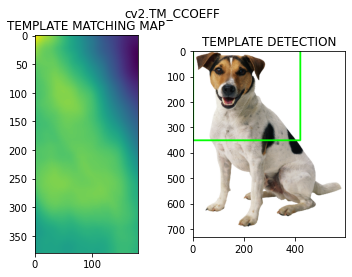

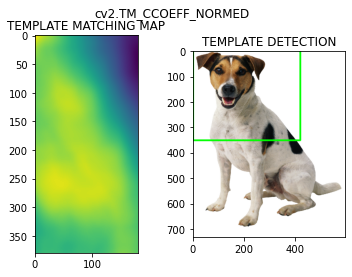

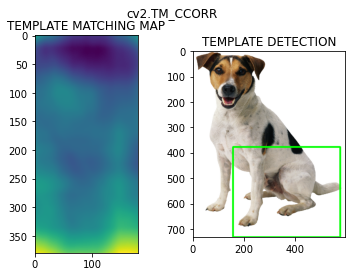

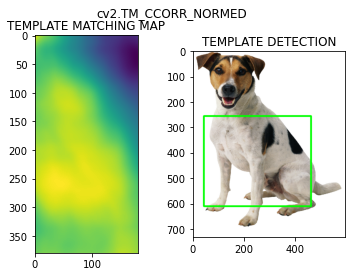

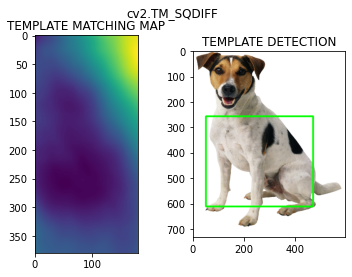

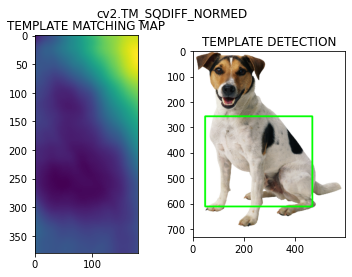

---------Rotado----------
------------------------


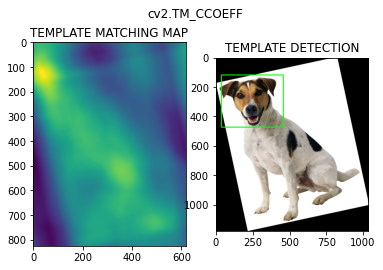

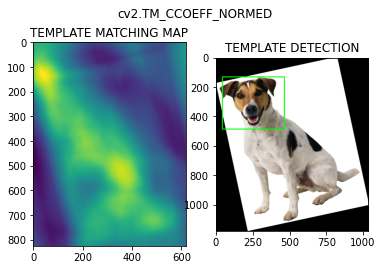

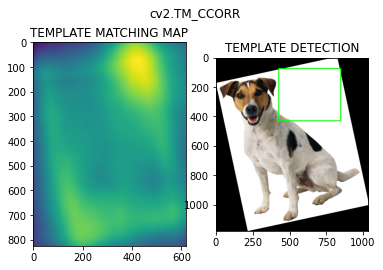

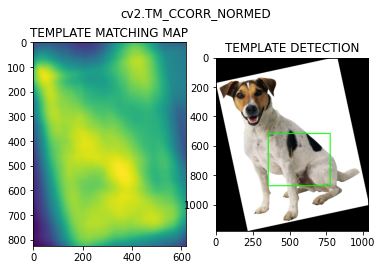

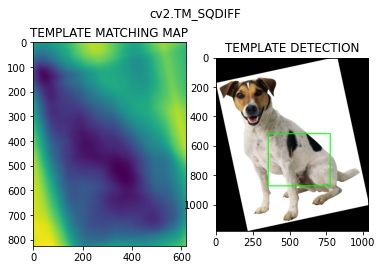

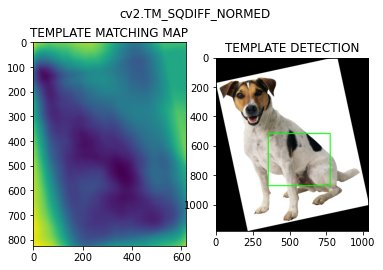

---------Oscurecido----------
------------------------


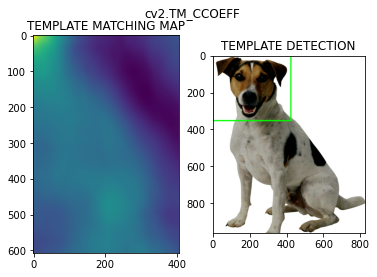

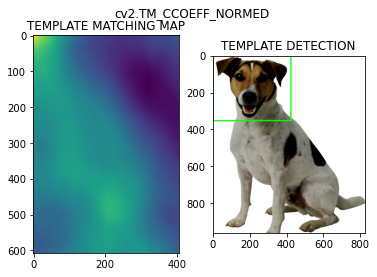

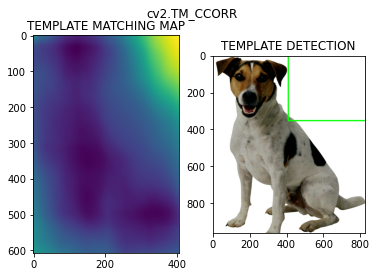

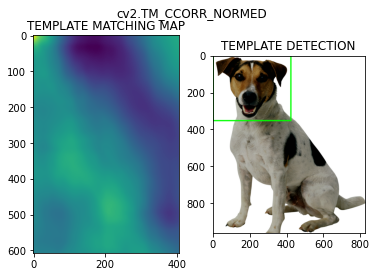

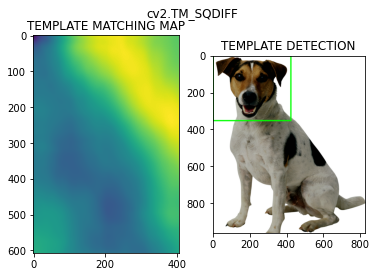

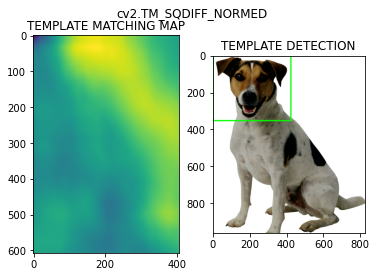

'\n--CUANDO SE AJUSTA EL TAMAÑO DE LA IMAGEN\nLos mejores  metodos son  templete coeficiente de correlacion (TM_CCOEFF) y (TM_CCOEFF_NORMED)\n--CUANDO SE GIRA LA IMAGEN\nLos mejores  metodos son TM_CCOEFF_NORMED y TM_CCOEFF_NORMED\n--CUANDO SE OSCURECE LA IMAGEN\nLos mejores metodos son TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR_NORMED, TM_SQDIFF y \nTM_SQDIFF_NORMED\n\n\n'

In [13]:
#Tarea Guia 10
#Alumno: Aucapiña Suvizarreta Edwar
#Codigo: 113572
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Ruta de la carptea
ruta="imageP10/"

template = cv2.imread(ruta+"template.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

#titulos de la imagen .png
img_title=["Reescalado","Rotado","Oscurecido"]

img=[]
for k in img_title:
    img.append(cv2.cvtColor(cv2.imread("imageP10/"+k+".png"), cv2.COLOR_BGR2RGB))

plt.imshow(template)
#--dimensiones de la plantilla
template.shape
#--lista con los nombres de diferentes métodos de coincidencia de plantillas.
methods =["cv2.TM_CCOEFF" , "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR" ,
          "cv2.TM_CCORR_NORMED" , "cv2.TM_SQDIFF" , "cv2.TM_SQDIFF_NORMED"]

#--obtener los resultados para cada metodo
for i in range(3):
    print("---------"+img_title[i]+"----------")
    print("------------------------")  
    for m in methods:
        
      img_copy = img[i].copy()
      method = eval(m)
      res = cv2.matchTemplate(img_copy,template,method)
      min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

      if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
      else:
        top_left = max_loc
      #print(top_left)    

      height, width, channels = template.shape  
      bottom_right = (top_left[0]+width, top_left[1]+height)

      cv2.rectangle(img_copy, top_left, bottom_right, (0,255,0),6)

      plt.subplot(121)
      plt.imshow(res)
      plt.title("TEMPLATE MATCHING MAP")
      plt.subplot(122)
      plt.imshow(img_copy)
      plt.title("TEMPLATE DETECTION")
      plt.suptitle(m)

      plt.show()


  
'''
--CUANDO SE AJUSTA EL TAMAÑO DE LA IMAGEN
Los mejores  metodos son  templete coeficiente de correlacion (TM_CCOEFF) y (TM_CCOEFF_NORMED)
--CUANDO SE GIRA LA IMAGEN
Los mejores  metodos son TM_CCOEFF_NORMED y TM_CCOEFF_NORMED
--CUANDO SE OSCURECE LA IMAGEN
Los mejores metodos son TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR_NORMED, TM_SQDIFF y 
TM_SQDIFF_NORMED


'''

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

template = cv2.imread("imageP10/template.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
img_reducida = cv2.imread("imageP10/reducida.png")
img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2RGB)
img_rotada = cv2.imread("imageP10/rotada.png")
img_rotada = cv2.cvtColor(img_rotada, cv2.COLOR_BGR2RGB)
#img_oscurecida = cv2.imread("imageP10/oscurecida.png")
#img_oscurecida = cv2.cvtColor(img_oscurecida, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.imshow(template)
#--dimensiones de la plantilla
template.shape
#--lista con los nombres de diferentes métodos de coincidencia de plantillas.
methods =["cv2.TM_CCOEFF" , "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR" ,
          "cv2.TM_CCORR_NORMED" , "cv2.TM_SQDIFF" , "cv2.TM_SQDIFF_NORMED"]

#--obtener los resultados para cada metodo
for m in methods:

  img_copy = img.copy()
  method = eval(m)
  res = cv2.matchTemplate(img_copy,template,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  print(top_left)    

  height, width, channels = template.shape  
  bottom_right = (top_left[0]+width, top_left[1]+height)

  cv2.rectangle(img_copy, top_left, bottom_right, (0,255,0),6)

  plt.subplot(121)
  plt.imshow(res)
  plt.title("TEMPLATE MATCHING MAP")
  plt.subplot(122)
  plt.imshow(img_copy)
  plt.title("TEMPLATE DETECTION")
  plt.suptitle(m)

  plt.show()
  print("\n")
  print("\n")